# Capitulo 3. Clasificación

Proyecto de clasificación, para diagnosticar medicamenttos basándose en las caracteristicas de los pacientes.

## <span style="color:green">1. Descargar los datos 📉</span>

EN ESTE PROYECTO SOLO VAMOS A NECESITAR LA BASE DE DATOS drug300.csv.💊




In [5]:
# Importa las librerias <3 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
#Cargar los datos a un dataframe
df = pd.read_csv("drug200.csv")

In [7]:
# Visualizar el DataFrame
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [8]:
# Obten información de los datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [9]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [10]:
df.min()

Age               15
Sex                F
BP              HIGH
Cholesterol     HIGH
Na_to_K        6.269
Drug           DrugY
dtype: object

In [11]:
df.max()

Age                74
Sex                 M
BP             NORMAL
Cholesterol    NORMAL
Na_to_K        38.247
Drug            drugX
dtype: object

## <span style="color:green">2. Análisis de cada Variable</span>

<Figure size 900x500 with 0 Axes>

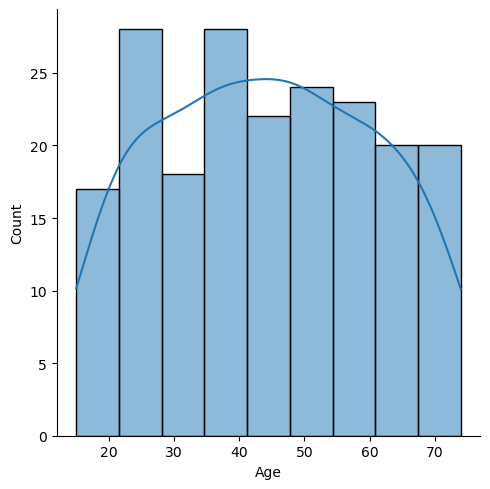

In [13]:
#Importa seaborn para tener gráficos más chidos 
plt.figure(figsize= (9,5))
sns.displot(df.Age,kde =True)
#Gráfica la variable 
#Establece una área de figsize(9,5) es decir, el tamaño de la imagen

#Crea un displot para de la edad (por ser una variable numérica)


In [14]:
# Género: cuenta cuántos hombres y mujeres hay
df.Sex.value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

<Axes: xlabel='BP', ylabel='Count'>

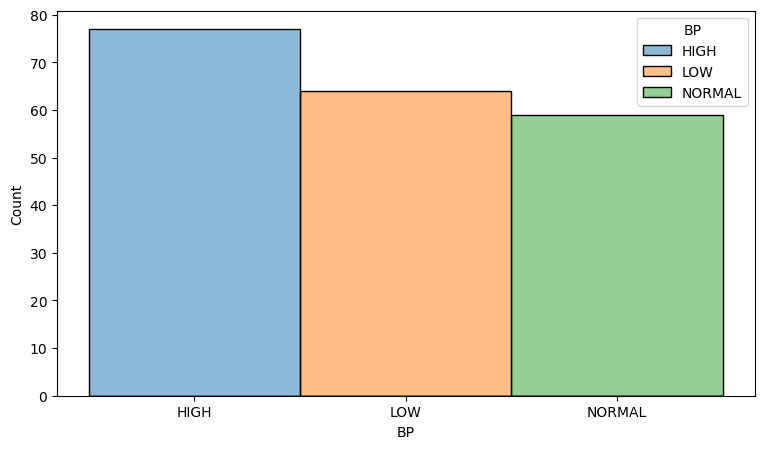

In [15]:
# Crea una gráfica de barras para Presión Sanguinea
plt.figure(figsize=(9,5))
sns.histplot(data =df, x= "BP", hue="BP")

<Axes: xlabel='Cholesterol', ylabel='Count'>

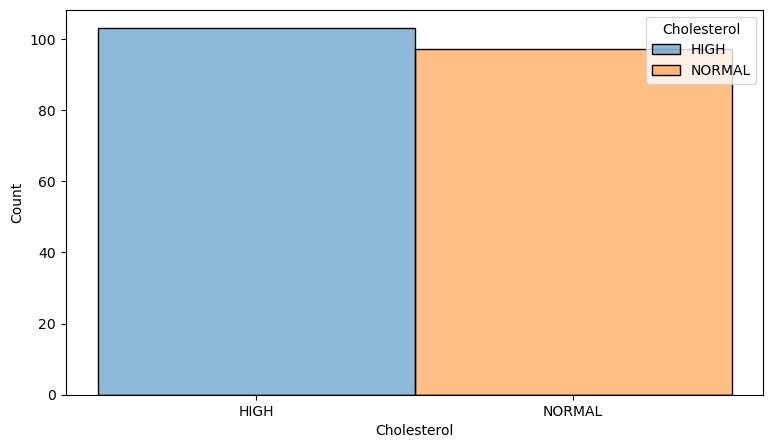

In [16]:
# Crea una gráfica de barras para Colesterol
plt.figure(figsize=(9,5))
sns.histplot(data =df, x= "Cholesterol", hue="Cholesterol")

<Figure size 900x500 with 0 Axes>

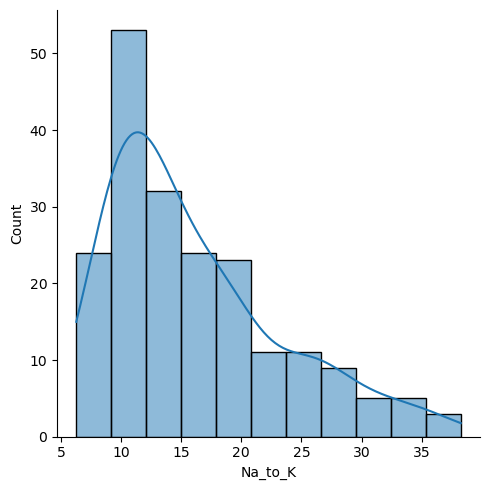

In [17]:
# Crea un displot para Sodio Potasio
plt.figure(figsize= (9,5))
sns.displot(df.Na_to_K,kde =True)

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

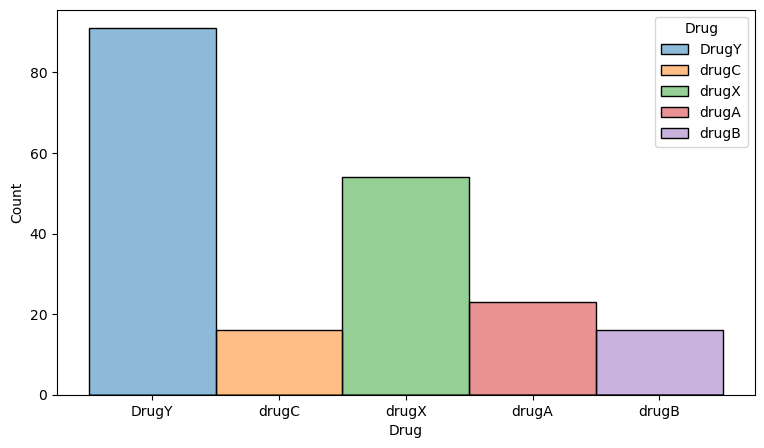

In [18]:
# Crea una gráfica de barras para los Medicamentos (droga) 💊
plt.figure(figsize=(9,5))
sns.histplot(data =df, x= "Drug", hue="Drug")
#Cuenta los medicamentos
df.Drug.value_counts()

***

## <span style="color:green">3. Análisis de Relación entre Variables</span>


Text(0.5, 1.0, 'Edad Vs Medicamento')

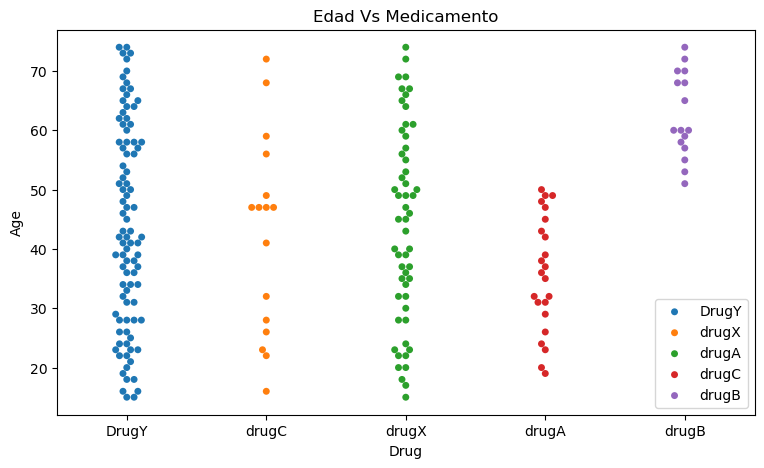

In [21]:
## Grafica (con swarmplot) la relación entre la Edad y los Medicamentos que se les da acorde a 💊
plt.figure(figsize = (9,5))
sns.swarmplot(data = df, x = "Drug", y = "Age", hue="Drug")
plt.legend(df.Drug.value_counts().index)
plt.title("Edad Vs Medicamento")

<Axes: xlabel='Drug', ylabel='count'>

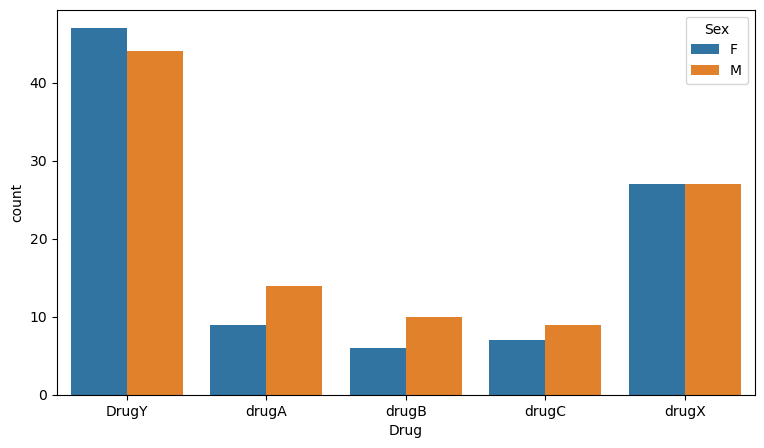

In [22]:
# Grafica la relación entre el el Género y los Medicamentos 💊 que se les da
#Primero armar una tablita para poder graficarlas
df_sex_drug = df.groupby(["Drug","Sex"]).size().reset_index(name = "count")
df_sex_drug
#Grafica la tablita anterior con una gráfica de barras
plt.figure(figsize = (9,5))
sns.barplot(data = df_sex_drug, x = "Drug", y = "count", hue = "Sex")

In [23]:
# Grafica la relación entre la Presión Sanguínea y los Medicamentos 💊
df_bp_drug = df.groupby(["Drug","BP"]).size().reset_index(name = "count")
df_bp_drug

,Drug,BP,count
0,DrugY,HIGH,38
1,DrugY,LOW,30
2,DrugY,NORMAL,23
3,drugA,HIGH,23
4,drugB,HIGH,16
5,drugC,LOW,16
6,drugX,LOW,18
7,drugX,NORMAL,36


Text(0.5, 1.0, 'Presion Sanguinea Vs Medicamento')

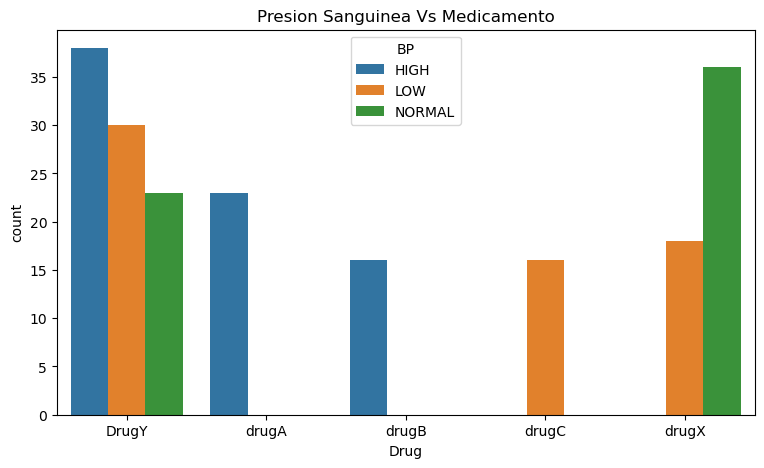

In [24]:
plt.figure(figsize=(9,5))
sns.barplot(data=df_bp_drug, hue="BP", x= "Drug", y= "count")
plt.title("Presion Sanguinea Vs Medicamento")

In [25]:
# Grafica (con una gráfica de barras)nla relación entre el nivel de colesterol y los medicamentos 💊
df_colesterol_drug = df.groupby(["Drug","Cholesterol"]).size().reset_index(name = "count")
df_colesterol_drug

,Drug,Cholesterol,count
0,DrugY,HIGH,47
1,DrugY,NORMAL,44
2,drugA,HIGH,12
3,drugA,NORMAL,11
4,drugB,HIGH,8
5,drugB,NORMAL,8
6,drugC,HIGH,16
7,drugX,HIGH,20
8,drugX,NORMAL,34


Text(0.5, 1.0, 'Colesterol Vs Medicamento')

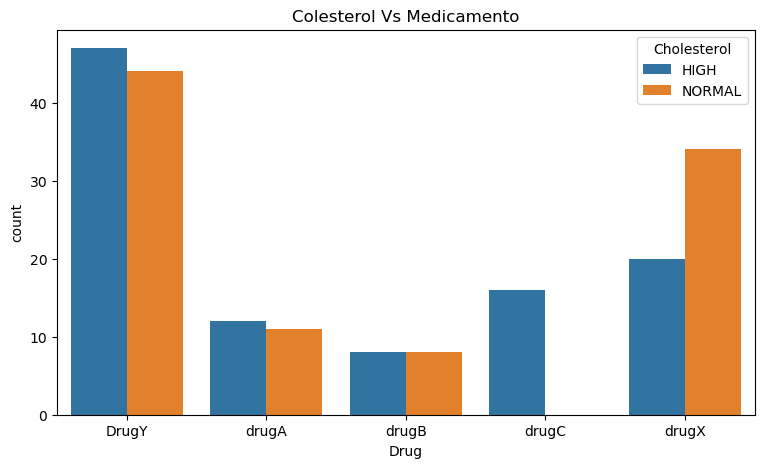

In [26]:
plt.figure(figsize=(9,5))
sns.barplot(data=df_colesterol_drug, hue="Cholesterol", x= "Drug", y= "count")
plt.title("Colesterol Vs Medicamento")

Text(0.5, 1.0, 'Sodio-Potasio Vs Medicamento')

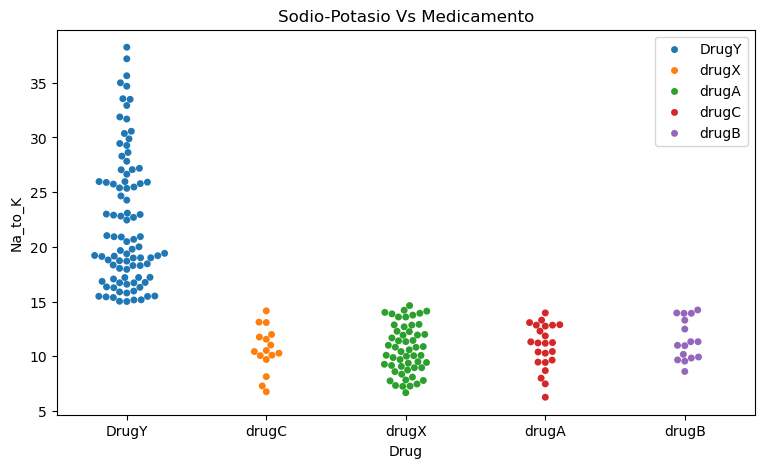

In [27]:
#Grafica (con un swarmplot) la relación entre el nivel de Sodio-Potasio y los medicamentos 💊 que se les da
plt.figure(figsize=(9,5))
sns.swarmplot(data=df, y="Na_to_K", x= "Drug", hue="Drug")
plt.legend(df.Drug.value_counts().index)
plt.title("Sodio-Potasio Vs Medicamento")

***

## <span style="color:green">4. Limpieza y Separación de Datos</span>


In [30]:
## Utilizar LabelEncoder para procesar variables alfanuméricas como el sexo, BP, Colesterol, étc
from sklearn.preprocessing import LabelEncoder
def label_encoder(datos_categoria):
    le=LabelEncoder()
    df[datos_categoria]= le.fit_transform(df[datos_categoria])

In [31]:
variables = ["Sex", "BP", "Cholesterol", "Na_to_K", "Drug"]
for l in variables:
    label_encoder(l)

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,167,0
1,47,1,1,0,89,3
2,47,1,1,0,43,3
3,28,0,2,0,10,4
4,61,0,1,0,133,0


In [32]:
x= df.drop("Drug", axis=1)
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,167
1,47,1,1,0,89
2,47,1,1,0,43
3,28,0,2,0,10
4,61,0,1,0,133


In [33]:
y= df.Drug
y.head()

0    0
1    3
2    3
3    4
4    0
Name: Drug, dtype: int32

In [34]:
# Crear set de entrenamiento y set de prueba
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2, random_state= 42, shuffle= True)

El 20% de los datos, serán de prueba. Shuffle será true. Semilla de Aleatoriedad=42

***

## <span style="color:green">5. Modelo de Clasificación Binario</span>


In [38]:
## Crear modelo para medicamento
y_train_y = y_train == 0
y_test_y = y_test == 0

Empezaremos con la medicina Y porque es la más popular y, por ende la más fácil de predecir

In [40]:
## Modelo SGD= Stochastic Gradient Descent (próximamente)
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state= 42)

In [41]:
sgd.fit(x_train, y_train_y)

SGDClassifier(random_state=42)

In [42]:
#Predecir la medicina a tomar de un humano que ya sepas el resultado 
sgd.predict([x_train.loc[10]]), y_train_y.loc[10]

C:\Users\brian\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


(array([False]), False)

👀: para saber que le esta yendo bien al modelo tienen que coincidir los resultados

***

## <span style="color:green">6. Medidas de desempeño</span>


### <span style="color:blue">6.1 Exactitud</span>

In [47]:
# Realiza una Cross validation/K-Folds
from sklearn.model_selection import cross_val_score
cross_val_score(sgd, x_train, y_train_y, cv= 3, scoring= "accuracy")

#Me arrojo 3 resultados diferentes, uno por cada cada conjunto de los k-folds

array([0.7962963 , 0.73584906, 0.71698113])

 
**cv:** número de dobleses 

**scoring:** accuracy (será nuestra medida de desempeño)  

In [49]:
# Modelo que nunca es Y
from sklearn.base import BaseEstimator
class NuncaC(BaseEstimator):
    def fit(self,X,y=None):
        return self
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

nunca_c = NuncaC()
cross_val_score(nunca_c,x_train,y_train_y,cv=3,scoring="accuracy")

array([0.57407407, 0.52830189, 0.47169811])

***

### <span style="color:blue">6.2 Matriz de Confusión</span>

In [52]:
# Matriz de confusión
#Importar cross_val_predict 
from sklearn.model_selection import cross_val_predict

#Importar confusion_matrix
from sklearn.metrics import confusion_matrix


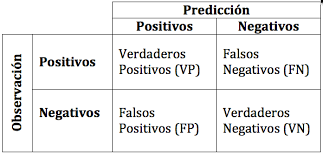

**Verdaderos Negativos**: esquina superior izquierda 

**Falsos positivos**: esquina superior derecha

**Falsos Negativos**: esquina inferior izquierda

**Verdaderos Positivos**: esquina inferior derecha 

In [55]:
y_train_predict = cross_val_predict(sgd, x_train, y_train_y, cv= 3)

In [56]:
y_train_predict

array([ True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True, False,  True, False,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
        True, False,  True, False, False,  True,  True, False, False,
        True, False, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
       False,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,

In [57]:
confusion_matrix(y_train_y, y_train_predict)

array([[44, 40],
       [ 0, 76]], dtype=int64)

In [58]:
# y_train_y es la verdad y y_train_predict son las predicciones del modelo

***

### <span style="color:blue">6.3 Precision y Recall</span>

In [61]:
#Importar precision_score y recall_score 
from sklearn.metrics import precision_score, recall_score

In [62]:
p = precision_score(y_train_y,y_train_predict)
r = recall_score(y_train_y, y_train_predict)
p,r

(0.6551724137931034, 1.0)

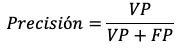

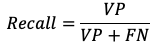

In [65]:
#Cambiar de clasificador
#Importar RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state= 42)
rfc.fit(x_train, y_train_y)

RandomForestClassifier(random_state=42)

In [66]:
y_train_predict = cross_val_predict(rfc, x_train, y_train_y, cv= 3)

In [67]:
#Hacer la matriz de confusión otra vez
confusion_matrix(y_train_predict, y_train_predict)

array([[86,  0],
       [ 0, 74]], dtype=int64)

In [68]:
#Calcular la precisión y recall con el nuevo clasificador 
p = precision_score(y_train_y,y_train_predict)
r = recall_score(y_train_y, y_train_predict)
p,r

(1.0, 0.9736842105263158)

In [69]:
#Calcular F1
from sklearn.metrics import f1_score
f1=f1_score(y_train_y, y_train_predict)
f1

0.9866666666666667

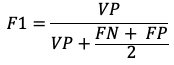

***

### <span style="color:blue">6.4 Umbral Precision y Recall</span>

In [73]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,167,0
1,47,1,1,0,89,3
2,47,1,1,0,43,3
3,28,0,2,0,10,4
4,61,0,1,0,133,0


In [74]:
#Puntación de un paciente aleatorio
y_score = sgd.decision_function([x_train.loc[0]])

C:\Users\brian\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [75]:
y_score

array([40133.06685807])

In [76]:
y_scores = cross_val_predict(sgd, x_train, y_train_y, cv= 3, method= "decision_function")

In [77]:
#y_scores

In [78]:
#Graficar la precisión y recall 
from sklearn.metrics import precision_recall_curve
precisions, recalls, umbrales = precision_recall_curve(y_train_y, y_scores)

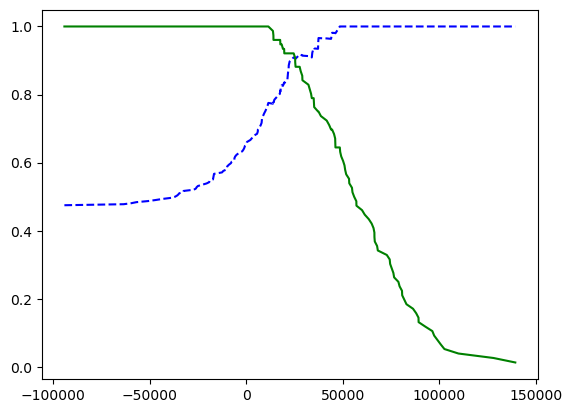

In [79]:
#Puedes visualizar los y_scores pero no te dice nada, la gráfica si lo hará 
#Graficar la precisión y recall, ahora si
plt.plot(umbrales, precisions[:-1], "b--", label ="Precision")
plt.plot(umbrales, recalls[:-1], "g-", label ="Recalls")
plt.show()

El umbral te permite conocer qué medida priorizar acorde a tus objetivos. Ya sea que estemos hablando de videos de youtube para niños 🍭 o un sistema de seguridad 🔒.

In [81]:
#Supon que ya lo pensaste y querías un umbral  90 
umbral_90 = umbrales[np.argmax(precisions>=0.90)]
umbral_90

24575.640603301497

In [82]:
y_train_90 = (y_scores>=umbral_90)

In [83]:
#Arroja la precisión y recall para un umbral de 90
p = precision_score(y_train_y, y_train_90)
r = recall_score(y_train_y, y_train_90)
p, r

(0.9090909090909091, 0.9210526315789473)

***

### <span style="color:blue">6.5 Curva ROC</span>


Grafica Recall contra el porcentaje de Falsos Positivos

In [87]:
#Importar roc_curve
from sklearn.metrics import roc_curve
fpr, tpr, umbrales = roc_curve(y_train_y, y_scores)

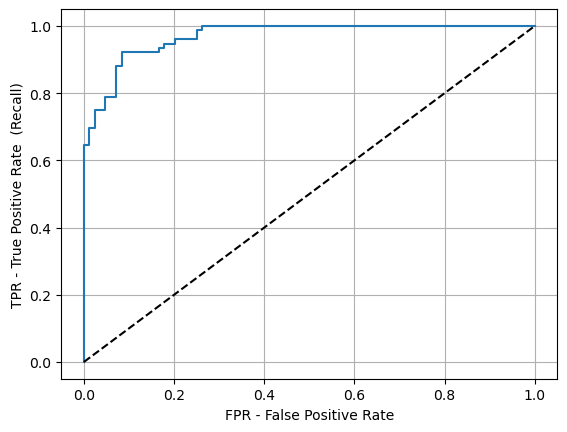

In [88]:
#Graficar la curva ROC
plt.plot(fpr, tpr, label = "ROC Curve")
plt.plot([0,1],[0,1], 'k--')
plt.xlabel("FPR - False Positive Rate")
plt.ylabel("TPR - True Positive Rate  (Recall)")
#Poner una cuadrícula
plt.grid()
plt.show()

Un modelo perfecto se asimila a una escuadra entre la curva ROC y la línea punteada porque existe una mayor área bajo la curva

In [90]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_y, y_scores)

0.9691416040100251

In [91]:
#Calcular el puntaje de la curva
y_forest = cross_val_predict(rfc, x_train, y_train_y, cv= 3, method = "predict_proba")
y_scores_forest = y_forest[:,1]
fpr_forest, tpr_forest, umbral_forest = roc_curve(y_train_y, y_scores_forest)

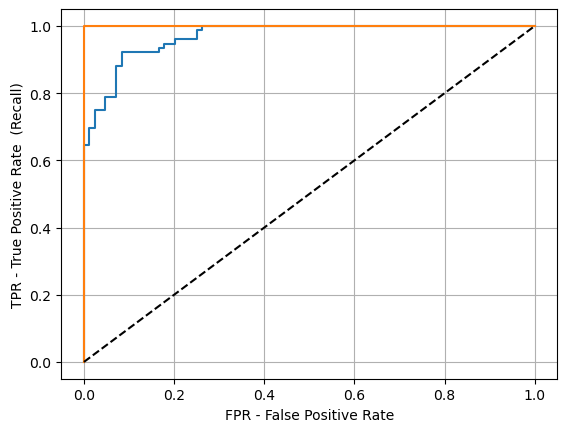

In [92]:
#Compararlo con el modelo de random forest
plt.plot(fpr, tpr, label = "ROC Curve")
plt.plot(fpr_forest, tpr_forest, label= "Random Forest ROC Curve")
plt.plot([0,1],[0,1], 'k--')
plt.xlabel("FPR - False Positive Rate")
plt.ylabel("TPR - True Positive Rate  (Recall)")
#Poner una cuadrícula
plt.grid()
plt.show()

In [93]:
#Graficar la curva ROC y la predicción de random forest 


In [94]:
#Calcular el puntaje (área bajo la curva) de random forest  
roc_auc_score(y_train_y, y_scores_forest)

1.0

***

## <span style="color:green">7. Clasificadores Multiclase</span>


In [179]:
# Importar SVC=Support Vector Classifier
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)


SVC()

In [187]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,167,0
1,47,1,1,0,89,3
2,47,1,1,0,43,3
3,28,0,2,0,10,4
4,61,0,1,0,133,0


In [185]:
#Predecir a un humano aleatorio para ver que todo este funcionando bien 
svm.predict([x_train.loc[0]])

C:\Users\brian\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [191]:
#Utilizar decision_function para observar los puntajes de cada medicina 
svm.decision_function([x_train.loc[0]])
#Decidirá por el qué tenga mayor puntaje

C:\Users\brian\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 4.29314545,  1.79128957,  0.76838448, -0.27065817,  3.16462775]])

In [199]:
#Ahora, utiliza el clasificador multiclase 
from sklearn.multiclass import OneVsRestClassifier
svm= OneVsRestClassifier(SVC())
svm.fit(x_train, y_train)

OneVsRestClassifier(estimator=SVC())

In [203]:
#Predecir a un humano ahora con este clasificador
#Utilizar decision_function para observar los puntajes de cada medicina 
svm.decision_function([x_train.loc[0]])

C:\Users\brian\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\brian\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\brian\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\brian\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\brian\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 2.31466773, -1.01816059, -1.01847764, -1.00071976, -1.08034559]])

In [205]:
#campararlo con los datos obtenidos de sgd.fit 
sgd.fit(x_train, y_train)

SGDClassifier(random_state=42)

In [209]:
sgd.decision_function([x_train.loc[0]])

C:\Users\brian\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[ 34119.59186544, -20230.79561182,  -7882.9384719 ,
        -11565.273663  ,  -8572.95224131]])

***

## <span style="color:green">8. Analizar Errores</span>

In [211]:
#Hacer un clasificador de random forest
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [215]:
#Utilizar la matriz de confusión 
y_train_pred = cross_val_predict(rfc, x_train, y_train, cv= 3)
conf_mtx = confusion_matrix(y_train, y_train_pred)
conf_mtx

array([[75,  0,  0,  1,  0],
       [ 0, 17,  0,  0,  0],
       [ 0,  1, 12,  0,  0],
       [ 0,  0,  0,  7,  4],
       [ 0,  0,  0,  0, 43]], dtype=int64)

In [217]:
y_test_pred = rfc.predict(x_test)

In [219]:
conf_mtx_test = confusion_matrix(y_test, y_test_pred)

In [221]:
conf_mtx_test

array([[15,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  5,  0],
       [ 0,  0,  0,  0, 11]], dtype=int64)

In [223]:
#utilizar ahora SGD
y_train_pred = cross_val_predict(sgd, x_train, y_train, cv= 3)
conf_mtx = confusion_matrix(y_train, y_train_pred)
conf_mtx

array([[61, 15,  0,  0,  0],
       [ 5, 10,  0,  0,  2],
       [ 3,  5,  1,  0,  4],
       [ 4,  5,  0,  0,  2],
       [16, 11,  1,  0, 15]], dtype=int64)

In [225]:
y_test_pred = sgd.predict(x_test)
conf_mtx_test = confusion_matrix(y_test, y_test_pred)
conf_mtx_test

array([[14,  0,  1,  0,  0],
       [ 2,  0,  4,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 1,  0,  2,  0,  2],
       [ 2,  0,  5,  0,  4]], dtype=int64)